




# <center> **Deep Neural Networks DNN** </center>






In [ ]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/')
print(os.getcwd())

Mounted at /content/drive
/content/drive


In [ ]:
#@title **Load libraries**
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. **From Logistic regresion to Neural Networks (NNs)**  <a name="LR_NN"></a>
The (logistic)-regression $ y = w_0 + w_1 x_1+  w_2 x_2 + \ldots + w_n x_n= w^{T}X$ could be represented as a neural graph:
        
**Actually** it could  be represented as a neural graph

<img src="https://github.com/wDavid98/IA-docs/blob/main/data/dl1.jpg?raw=true" >

Why **there is** a relationship with **biological** neurons

<img src="https://github.com/wDavid98/IA-docs/blob/main/data/singleN.png?raw=true" >

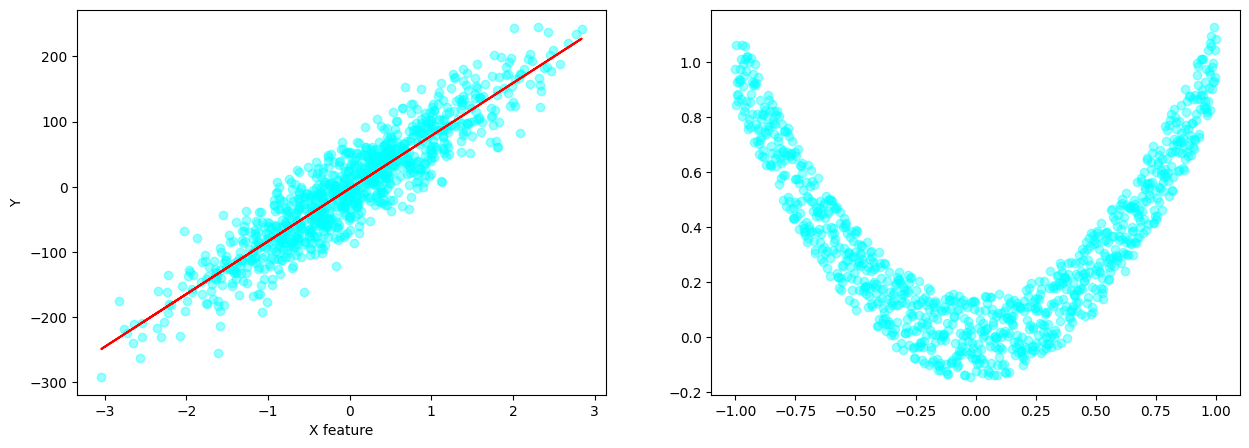

In [ ]:
#@title Is it a **logistic regression** or  a **neural network**?
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Weights
w_0 =  -2.80#@param {type:"number"}
w_1 =  80.92#@param {type:"number"}

# Normalizing the data
np.random.seed(1)
scaler_l = StandardScaler()

# Linear function
X_l, Y_l = make_regression(n_samples=1000, n_features=1,\
                       n_informative=1,random_state=0, noise=35)

X_l_scal = scaler_l.fit_transform(X_l)
y_est=w_0 +w_1*X_l_scal

# Polinomic function
x_pol = np.linspace(-1,1,1000)
y_pol = x_pol**2 + (np.random.random(x_pol.shape)-0.5)*0.3

# Plotting the results
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_l_scal, Y_l, c="cyan", alpha=0.4)
ax.plot(X_l_scal , y_est, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_pol, y_pol, c="cyan", alpha=0.4)

## **But** what happen if we have **non linear** boundaries?

---


## R:/  TO ADD HIDDEN LAYERS: TO BE DEEP!!

In fact, the biological systems works in similar way...


<img src="https://github.com/wDavid98/IA-docs/blob/main/data/neurons-and-dl2.png?raw=true" >

### **Deep Neural Networks**

DNN is a machine learning strategy based on a collection of connected **neuron units**, inspired  in biological systems, that uses **multiple layers** to progressively extract **higher level representations**.

- **Neurons:** basic units that code a relationship between inputs in previous layers.
- **Input layers:**  are new information, namely a vectorized version of each sample.
- **Hidden layers:** are internal correlation on the network, which do the **magic!** The input units and previous layers are correllated wit some **learned weights**.
- **Activation functions:** introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.
    - *Softmax*, used in classification tasks, takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one to ensure that the outputs are probabilities.
  
- **Output layers** Give the result on correlation of network units, and namelly is mapped to a **sofmax function** to give a probability of each class.

## **CHALLENGE**

The operation of the network is based on the computation of successive operations at each **neuron** ($a$), defined as:

$$a_{j}^{l}=\sigma(z_{j}^{l})$$

$$z_{j}^{l}=\sum_{k}w_{j,k}^{l}a_{k}^{l-1}+b_{j}^{l},$$

where:

- $w_{j,k}^{l}$ indicates the weights or coefficients of the **linear model** of each neuron. Specifically,
- $l$ indicates the layer,
- $j$ indicates the output neuron
- $k$ indicates the input neuron.
- The $\sigma$ function (**the activation**)indicates a transformation function such as **sigmoid** or **logit** function. This function induces non-linearity to adjust model to more complex data.
- The graphics do not consider bias for simplicity.

The **output of the network** defines the problem:

- **The regression problems** with a single neuron in the output layer.

- **The classification problems** usually define one neuron for each class and the activation is a *softmax*.



---


## **CHALLENGE**

- The above net schemes are for regression or for classification problem?
- It is possible to make a neural network by using basic logic gates?

The architecture presented is known as **Feed Forward Neural Network** and is one of the most basic structures. There exist a wide number of architectures are presented.



The DNN is operated in two ways:

1. A forward propagation step, for test, to compute the output of the network.
2. A backward propagation step, for training, in which the error at the end of the network is propagated backward through all the neurons while updating their parameters. (**Sounds like a gradient, doesn't it?**).
 - This step include iteratively (backward-forward)

# 2. **Deep Neural Networks (DNN): The Forward Step**  <a name="DNN"></a>


During the forward step, the input will be propagated to the output net.


- The output of each neuron is obtained from output of neurons in previous layer, defined as: $z_{j}^{l}=Z^{l}=W^{l}\cdot A^{l-1}+b^{l},$
where $A^0=Inputs$

- The calculation of "$A$" is involved into a transformation or activation function, as sigmoid function: $\sigma(Z) = \frac{1}{1+e^{-Z}}$

To toy net (illustrated above) there is two set of weights: $W_1$ ( connect the input layer with the hidden layer) and $W_2$ ( connect the hidden layer with the output layer). Each set is arranged in a matrix
  - These weights are arrenged in a matrix with rows as the number of neurons in the next layer and the number of columns indicate the neurons in the previous layer, as:

| | |
|:-------------------------:|:-------------------------:|
|$$\large W_1=W_{[j=1:3,k=1:2]}^{l=2}=\left( \begin{matrix}
w_{1,1}^2 & w_{1,2}^2 \\
w_{2,1}^2 & w_{2,2}^2 \\
w_{3,1}^2 & w_{3,2}^2
\end{matrix} \right)$$ |  <img src="https://github.com/wDavid98/IA-docs/blob/main/data/DNN_1_1.png?raw=true" width="400" >|







For instance, we will run the  `make_regression` with two variables:

In [ ]:
#@title **Coding:** Loading data
scaler_l = StandardScaler()
X_l, Y_l = make_regression(n_samples=5000, n_features=2,
                                      n_informative=2, noise=10,
                                      coef=False, random_state=0)
X_l_scal = scaler_l.fit_transform(X_l)
print(X_l_scal.shape, Y_l.shape)

(5000, 2) (5000,)


## **CHALLENGE**

- Implement forward propagation for next weights
- Drawn the computed stimations
- It is magic... how did the weights appear?

In [ ]:
#@title **Coding:** What if we have the weights setted?
W1 = np.array([[-0.73731834, -4.9123926 ],
       [-0.9785055 , -3.6975048 ],
       [ 0.9115143 ,  3.8996382 ]])
b1 = np.array([[ 5.4024553],[-0.8736336],[ 5.9712057]])

W2= np.array([[-59.251694, -55.481842,  60.09115 ]])
b2= np.array([23.147457])
print("W1= ", W1.shape, "b1= ", b1.shape, " W2= ", W2.shape, " b2 =", b2.shape)

W1=  (3, 2) b1=  (3, 1)  W2=  (1, 3)  b2 = (1,)


In [ ]:
#@title **code student:** testing forward
def forward_Z2_function(W1, W2, b1, b2, X_l_scal):
  #Load imports
  import numpy as np

  """
  Put your code here
  Clue: do you have to set the Z1, its actitavion and the new neuron value
  It means... what is Z1, A1 and Z2?
  """

  return Z2

Z2 = forward_Z2_function(W1, W2, b1, b2, X_l_scal)
print("Z2: \n", Z2)
print(Z2.shape)

Z2: 
 [[0.94667121 0.94610899 0.94554661 ... 0.94641528 0.94705231 0.94768936]]
(1, 5000)


Text(0, 0.5, 'Y')

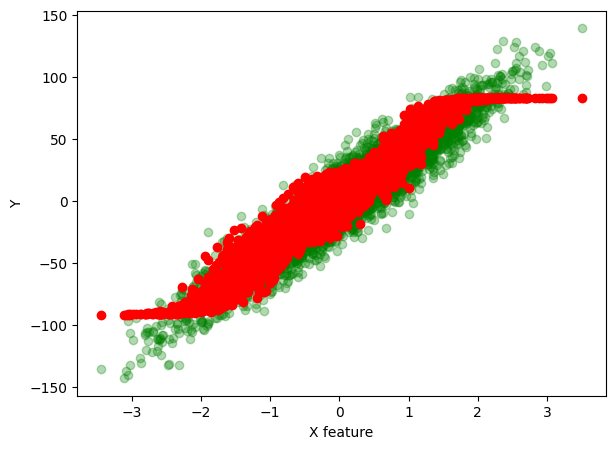

In [ ]:
#@title plot results

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_l_scal[:,1], Y_l, c="green", alpha=0.3)
ax.scatter(X_l_scal[:,1] , Z2, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')


## **CHALLENGE**

- Implement forward propagation for next weights
- Drawn the computed stimations
- It is magic, How did the weights appear?

(3, 2) (3, 1) (1, 3) (1,)
Z2: 
 [[0.94667121 0.94610899 0.94554661 ... 0.94641528 0.94705231 0.94768936]]


Text(0, 0.5, 'Y')

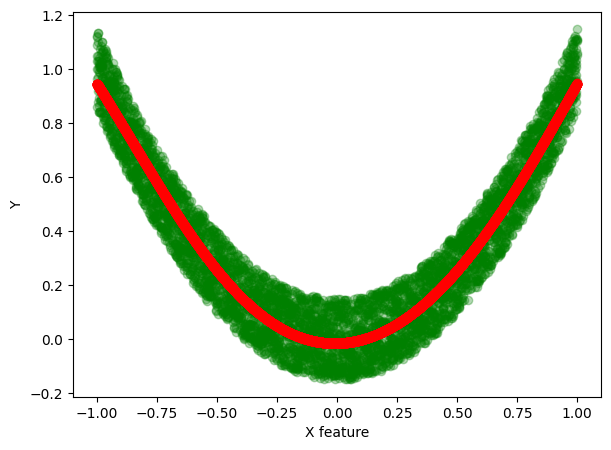

In [ ]:
#@title **Student code for the solution** What if we test in more complex data

x_pol = np.linspace(-1,1,5000)
y_pol = x_pol**2 + (np.random.random(x_pol.shape)-0.5)*0.3
x2d_pol =np.array([np.linspace(-1,1,5000), np.linspace(0,1,5000)]).T

W1 = np.array([[ 2.084589  ,  1.7026256 ],
       [ 2.3564532 , -0.07287475],
       [ 1.0032609 ,  0.74192464]])
b1 = np.array([[ 1.5538876 ],[-2.294058  ],[ 0.29662362]])

W2= np.array([[-2.0751796 ,  2.8317351 , -0.15121211]])
b2= np.array([1.7383667])
print(W1.shape,  b1.shape, W2.shape, b2.shape)

# implement Forward...
def implement_forward_Z2(W1, W2, b1, b2, x2d_pol):
  import numpy as np


  return Z2


print("Z2: \n", Z2)

Z2 = implement_forward_Z2(W1, W2, b1, b2, x2d_pol) ## Colocar esta linea
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x2d_pol[:,0], y_pol, c="green", alpha=0.3)
ax.scatter(x2d_pol[:,0] , Z2, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')

# 3. **Backpropagation: the DNN Backward step**  <a name="Backprop"></a>


[originalPaper](https://www.nature.com/articles/323533a0)

Now, we need to find the **magic weights!**, which means reduce the cost with respect the weights $\frac{\partial \mathbf{J(W)}}{\partial W}$.
- We have *the Holy grail*, that is **gradient descent** to effectively find parameters of funtion (set of weigths):
$$W := W - \alpha \frac{\partial \mathbf{J(W)}}{\partial W}$$

But... $\frac{\partial \mathbf{J(W)}}{\partial W}$ is a very complex expression, so, How to estimate $\frac{\partial\mathbf{J(W)}}{\partial W}$?

R:/ back-progating the error from last layer until first layer.

The backpropagation is an algorithm to minize iteratively the cost of a DNN.

#### **3.1 How change error with respect last layer $\frac{\partial J}{\partial w^L, b^{L}}$** ?


<center><img src="https://github.com/wDavid98/IA-docs/blob/main/data/DNN_4.png?raw=true" width="700" ></center>


Because we have **compose function** we should use **chain rule!**

From weights                                          | | From bias
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       |
$$\large \frac{\partial J}{\partial w^L} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^L}\frac{\partial a^L}{\partial z^L}}}\frac{\partial z^L}{\partial w^L}$$  |     |$$\large \frac{\partial J}{\partial b^L} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^L}\frac{\partial a^L}{\partial z^L}}}\frac{\partial z^L}{\partial b^L}$$

Looks complex, but pay attention:

1.


__IF__ $J(a^{L})$                                        |     | __Then__ $\frac{\partial J}{\partial a^L}$
:---------------------------------------------------: |       | :---------------------------------------------------:
                                                       |
$$ J(a^{L}) = \frac{1}{2m}\sum_{i=1\ldots m}(y_i -a_{i}^{L})^{2}$$  |        |$$ \to \frac{\partial J}{\partial a^L} = (y_i -a_{i}^{L})$$


2.



__IF__ $a^{L}(z^L)$                                        |     | __Then__ $\frac{\partial a^L}{\partial z^L}$
:---------------------------------------------------: |       | :---------------------------------------------------:
                                                       |
$$ a^{L}(z^L) = \frac{1}{1+ e^{-z}}$$  |        |$$ \to \frac{\partial a^L}{\partial z^L} = a^{L}(z^L) (1 - a^{L}(z^L))$$

see proof [here](http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm)

3.


__IF__ $z^{L}$                                        |     | __Then__ $\left [ \frac{\partial z^L}{\partial w^L}, \frac{\partial z^L}{\partial b^L} \right ]$
:---------------------------------------------------: |       | :---------------------------------------------------:
                                                       |
$$ \large z^{L} = \sum_{i} a_{i}^{L-1}w_{i}^{L} + b^{L}$$  |        |$$\to \left [ \frac{\partial z^L}{\partial b^L}=1, \frac{\partial z^L}{\partial w^L}=a_{i}^{L-1} \right ]$$




#### **3.2 How change error in other layers $\frac{\partial J}{\partial w^{l-1}, b^{l-1}}$** ?

Using same function composition: $J(a^{L}(W^{L}a^{l-1}(W^{l-1}a^{l-2} + b^{l-1})+ b^{L}))$ , we obtain a recursive expression, as:

From weights                                          | | From bias
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       |
$$\large  \frac{\partial J}{\partial w^{L-1}} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^{L}}\frac{\partial a^L}{\partial z^L}}} \underset{W^{l}}{\underbrace{\frac{\partial z^L}{\partial a^{L-1}}}} \underset{d(f(x))}{\underbrace{\frac{\partial a^{L-1}}{\partial z^{L-1}}}}
 \underset{a^{l-2}}{\underbrace{\frac{\partial z^{L-1}}{\partial w^{L-1}}}}$$  |     |$$\large  \frac{\partial J}{\partial b^{L-1}} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^{L}}\frac{\partial a^L}{\partial z^L}}} \underset{W^{l}}{\underbrace{\frac{\partial z^L}{\partial a^{L-1}}}} \underset{d(f(x))}{\underbrace{\frac{\partial a^{L-1}}{\partial z^{L-1}}}}
 \underset{a^{l-2}}{\underbrace{\frac{\partial z^{L-1}}{\partial b^{L-1}}}}$$

#### **3.3 In summary**



The summary of algorithm is:

- Training set: $(\mathbf{x}, \mathbf{y}) = \{x^{i}, y^{i}\}_{i=1 \ldots m}$
- Random initialization of $\mathbf{W}$
- **set** $a^{(1)} = \mathbf{x}$
- Perform Forward prop $\to a^{(l)}, l=2\ldots L$
- Error in last layer. Use $\mathbf{y}$ to compute $\delta^{(L)}$:
  - $\delta^{(L)} = \frac{\partial J}{\partial a^{L}}\frac{\partial a^L}{\partial z^L}$
- Backpropagate error. To compute $\delta^{(l-1)}, \delta^{(l-2)}, \ldots, \delta^{(2)} $
  - $\delta^{(l-1)} = W^{l}\delta^{(l)}\frac{\partial z^{l-1}}{\partial a^{l-1}}$
- To compute $\sim \frac{\partial}{\partial w_{ij}^{(l)}} \mathbf{J(W)}$
  - $\frac{\partial J}{\partial w^{L-1}} \sim  \delta^{(l-1)}a^{l-2}$
  - $\frac{\partial J}{\partial b^{L-1}} \sim  \delta^{(l-1)} $

So,
$$W_{i,j}^{l} := W_{i,j}^{l}  \pm \alpha  \frac{\partial \mathbf{J(W)}}{\partial W}$$

## **CHALLENGE**

- What about stocastic gradient descent (SGD)?

**Go to the action!**

# **4. DNN in Tensorflow with KERAS** <a name="DNN_Keras"></a>

Now, we going to use keras to implement DNN and other deep architectures (forward and backpropagation). Firstly, we going to implement the simplest regression nets, as illustrated in the figure:

<img src="https://github.com/wDavid98/IA-docs/blob/main/data/DNN_1_1.png?raw=true" width="400" >

Now, we will load `TensorFlow` and the dataset `make_regression`

In [ ]:
#@title **Coding:** Loading the libraries and the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

scaler_l = StandardScaler()
X_l, Y_l = make_regression(n_samples=5000, n_features=2,
                                      n_informative=2, noise=10,
                                      coef=False, random_state=0)
X_l_scal = scaler_l.fit_transform(X_l)
print(X_l_scal.shape, Y_l.shape)

(5000, 2) (5000,)


Now, we implement DNN proposed architecture:

In [ ]:
#@title **Coding:** Building DNN models
model_l =  tf.keras.Sequential([
                             tf.keras.layers.Dense(3, activation='sigmoid', input_shape=[X_l_scal.shape[1]]),
                             tf.keras.layers.Dense(1)])
model_l.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

We can explore DNN of weights at this point, as:

In [ ]:
#@title **Coding:** How do we obtain the weights?
def obtain_weights(model_l):
  second_layer_weights = model_l.layers[0].get_weights()[0].T
  second_layer_biases  = model_l.layers[0].get_weights()[1]
  second_layer_biases = second_layer_biases.reshape(second_layer_biases.shape[0], 1)
  third_layer_weights = model_l.layers[1].get_weights()[0].T
  third_layer_biases  = model_l.layers[1].get_weights()[1]
  print("L2: ", "\n", second_layer_weights)
  print("b2: ", "\n", second_layer_biases)
  print("L2: ", second_layer_weights.shape, "b2: ", second_layer_biases.shape, " W3: ",third_layer_weights.shape, " b3: ", third_layer_biases.shape  )
obtain_weights(model_l)

L2:  
 [[ 0.43719438  4.1841555 ]
 [ 0.8420996   3.837129  ]
 [-0.8180275  -4.162873  ]]
b2:  
 [[-5.045154  ]
 [ 0.05347588]
 [-5.7324634 ]]
L2:  (3, 2) b2:  (3, 1)  W3:  (1, 3)  b3:  (1,)


Now,
- We define the optimizer, in this case closer version is SGD (**stochastic gradient descent**)
- Fit model (**train**) by using backpropagation+gradient descent
- Evaluate the model

In [ ]:
#@title **Coding:** It is time to train the model
optimizer = tf.keras.optimizers.SGD()
model_l.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
iterations = 50
history = model_l.fit(X_l_scal, Y_l, epochs=iterations,  validation_split = 0.2, verbose=False)

Finally, we can drawn boundaries and see the **magic!**

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(5000, 1)


Text(0, 0.5, 'Y')

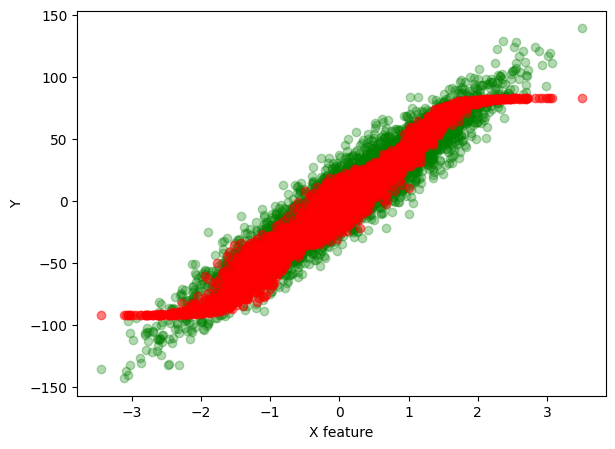

In [ ]:
#@title **Coding:** Now it is time to predict the model
y_est = model_l.predict(X_l_scal)
print(y_est.shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_l_scal[:,1], Y_l, c="green", alpha=0.3)
ax.scatter(X_l_scal[:,1] , y_est, c="red", alpha=0.5)

ax.set_xlabel('X feature')
ax.set_ylabel('Y')

Also, we can evaluate the performance and obtain train weights


In [ ]:
#@title **Coding:** Evaluating the cost
loss, mae, mse = model_l.evaluate(X_l_scal, Y_l)
print(loss, mae, mse)
obtain_weights(model_l)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 134.1888 - mae: 9.0637 - mse: 134.1888
135.25328063964844 9.110608100891113 135.25328063964844
L2:  
 [[ 0.43719438  4.1841555 ]
 [ 0.8420996   3.837129  ]
 [-0.8180275  -4.162873  ]]
b2:  
 [[-5.045154  ]
 [ 0.05347588]
 [-5.7324634 ]]
L2:  (3, 2) b2:  (3, 1)  W3:  (1, 3)  b3:  (1,)


## **CHALLENGE**

Now, train the same architecture but using `y_pol, x2d_pol` and drawn the results.

In [ ]:
#@title **Student code for the solution**

"""
Please put your code here
"""


'\nPlease put your code here\n'

We can play with this application to [tensorflow](https://playground.tensorflow.org/) for a better intuition of Deep neural networks!

# **References**

[1. How the backpropagation algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)

[2. Playground tensorflow](https://playground.tensorflow.org/)

[3. Backpropagation](https://www.youtube.com/watch?v=eNIqz_noix8)

[4. Matemáticas de Backpropagation](https://www.youtube.com/watch?v=M5QHwkkHgAA)

[5. Neural Networks zoo](https://www.asimovinstitute.org/neural-network-zoo/)

[6. Learning representations by back-propagating errors
](https://www.nature.com/articles/323533a0)

